In [ ]:
http://stackoverflow.com/questions/6136588/image-cropping-using-python

In [ ]:
http://2017.compciv.org/guide/topics/python-nonstandard-libraries/pillow.html

In [2]:
from PIL import Image
im=Image.open('tensordream001.jpg')
im.size # (width,height) tuple

(612, 451)

In [1]:
!ls

sizing-and-cropping.ipynb  tensor005.jpg  tensor009.jpg  tensor013.jpg
tensor002.jpg		   tensor006.jpg  tensor010.jpg  tensor014.jpg
tensor003.jpg		   tensor007.jpg  tensor011.jpg  tensordream001.jpg
tensor004.jpg		   tensor008.jpg  tensor012.jpg


In [3]:
def add_cursor(fig, ax):
    plt.close(fig)

    vline = ax.axvline(1, color='k')
    hline = ax.axhline(0.5, color='k')

    def set_cursor(x, y):
        vline.set_xdata((x, x))
        hline.set_ydata((y, y))
        display(fig)

    interact(set_cursor, x=ax.get_xlim(), y=ax.get_ylim())

/home/jack/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


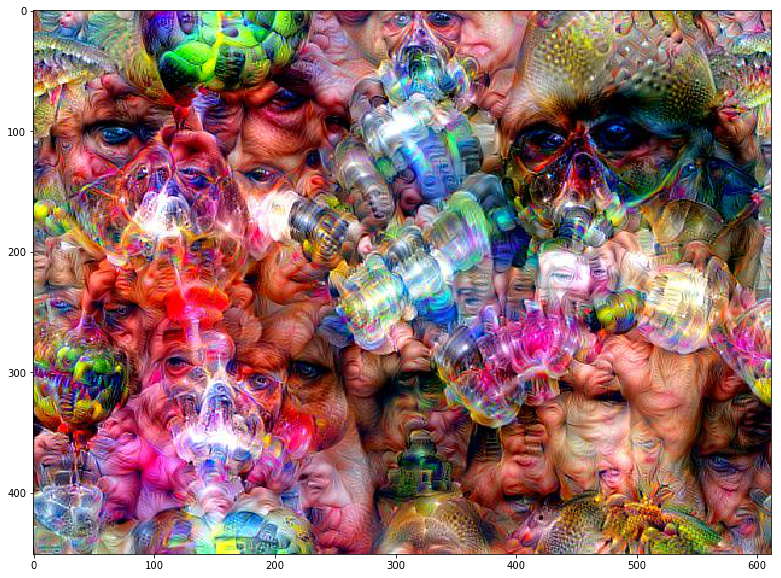

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('tensordream001.jpg')
imgplot = plt.imshow(img)


In [31]:
from PIL import Image
img = Image.open('specral__.jpg')
crop_specs = (145, 50, img.width - 40, img.height - 135)
crop_img = img.crop(crop_specs)


crop_img.save('newimage.png')   

img=mpimg.imread('newimage.png')
imgplot = plt.imshow(img)

In [30]:
from PIL import Image
im=Image.open('newimage.png')
im.size # (width,height) tuple

(815, 805)

In [ ]:
http://mpld3.github.io/

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import matplotlib.patches as mpatches

import mpld3
from mpld3 import plugins, utils


class LinkedDragPlugin(plugins.PluginBase):
    JAVASCRIPT = r"""
    mpld3.register_plugin("drag", DragPlugin);
    DragPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    DragPlugin.prototype.constructor = DragPlugin;
    DragPlugin.prototype.requiredProps = ["idpts", "idline", "idpatch"];
    DragPlugin.prototype.defaultProps = {}
    function DragPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    DragPlugin.prototype.draw = function(){
        var patchobj = mpld3.get_element(this.props.idpatch, this.fig);
        var ptsobj = mpld3.get_element(this.props.idpts, this.fig);
        var lineobj = mpld3.get_element(this.props.idline, this.fig);

        var drag = d3.behavior.drag()
            .origin(function(d) { return {x:ptsobj.ax.x(d[0]),
                                          y:ptsobj.ax.y(d[1])}; })
            .on("dragstart", dragstarted)
            .on("drag", dragged)
            .on("dragend", dragended);

        lineobj.path.attr("d", lineobj.datafunc(ptsobj.offsets));
        patchobj.path.attr("d", patchobj.datafunc(ptsobj.offsets,
                                                  patchobj.pathcodes));
        lineobj.data = ptsobj.offsets;
        patchobj.data = ptsobj.offsets;

        ptsobj.elements()
           .data(ptsobj.offsets)
           .style("cursor", "default")
           .call(drag);

        function dragstarted(d) {
          d3.event.sourceEvent.stopPropagation();
          d3.select(this).classed("dragging", true);
        }

        function dragged(d, i) {
          d[0] = ptsobj.ax.x.invert(d3.event.x);
          d[1] = ptsobj.ax.y.invert(d3.event.y);
          d3.select(this)
            .attr("transform", "translate(" + [d3.event.x,d3.event.y] + ")");
          lineobj.path.attr("d", lineobj.datafunc(ptsobj.offsets));
          patchobj.path.attr("d", patchobj.datafunc(ptsobj.offsets,
                                                    patchobj.pathcodes));
        }

        function dragended(d, i) {
          d3.select(this).classed("dragging", false);
        }
    }

    mpld3.register_plugin("drag", DragPlugin);
    """

    def __init__(self, points, line, patch):
        if isinstance(points, mpl.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "drag",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "idpatch": utils.get_id(patch)}


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices[:-1])
points = ax.plot(x, y, 'go', ms=10)
line = ax.plot(x, y, '-k')

ax.grid(True, color='gray', alpha=0.5)
ax.axis('equal')
ax.set_title("Drag Points to Change Path", fontsize=18)

plugins.connect(fig, LinkedDragPlugin(points[0], line[0], patch))

mpld3.display()

In [44]:
import matplotlib.pyplot as plt
import numpy as np

import mpld3
from mpld3 import plugins

fig, ax = plt.subplots()

x = np.linspace(-2, 2, 20)
y = x[:, None]
X = np.zeros((20, 20, 4))

X[:, :, 0] = np.exp(- (x - 1) ** 2 - (y) ** 2)
X[:, :, 1] = np.exp(- (x + 0.71) ** 2 - (y - 0.71) ** 2)
X[:, :, 2] = np.exp(- (x + 0.71) ** 2 - (y + 0.71) ** 2)
X[:, :, 3] = np.exp(-0.25 * (x ** 2 + y ** 2))

im = ax.imshow(X, extent=(10, 20, 10, 20),
               origin='lower', zorder=1, interpolation='nearest')
fig.colorbar(im, ax=ax)

ax.set_title('An Image', size=20)

plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.image as mpimg
import numpy as np
import mpld3
from mpld3 import plugins



img=mpimg.imread('specral__.jpg')
#imgplot = plt.imshow(img)
plugins.connect(fig, plugins.MousePosition(fontsize=14))
imgplot = plt.imshow(img)
mpld3.display()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()


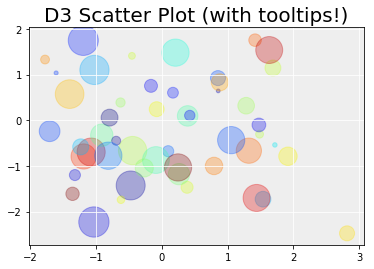

In [38]:
from mpld3 import plugins

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]

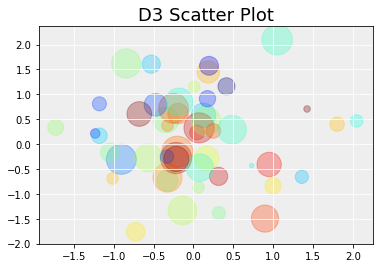

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()




fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot", size=18);

In [ ]:
fig, ax = plt.subplots()
ax.plot([3,1,2,4,0,5,3,2,0,2,4])
plt.close(fig)

vline = ax.axvline(1)
hline = ax.axhline(0.5)

def set_cursor(x, y):
    vline.set_xdata((x, x))
    hline.set_ydata((y, y))
    display(fig)

interact(set_cursor, x=(1, 9, 0.01), y=(0, 5, 0.01))